<div id="container" style="position:relative;">
<div style="float:left"><h1>Home Value Analysis - Sri Casper</h1>
</div>
<div style="position:relative; float:right">

## Dataset

'prop_2016_cleaned.csv' and 'prop_2017_cleaned.csv' are the cleaned version of the original datasets from Zillow, an American real-estate marketplace company. Zillow uses 'Zestimate' to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. In this notebook, some machine learning techniques will be uesd to estimate the assessed values of the properties.

## Data Dictionary

`parcelid`: Unique identifier for parcels (lots) 

`bathroomcnt`: Number of bathrooms in home including fractional bathrooms

`bedroomcnt`: Number of bedrooms in home 

`buildingqualitytypeid`: Overall assessment of condition of the building from best (lowest) to worst (highest)

`calculatedfinishedsquarefeet`: Calculated total finished living area of the home 

`finishedsquarefeet12`: Finished living area

`fullbathcnt`: Number of full bathrooms (sink, shower + bathtub, and toilet) present in home

`latitude`: Latitude of the middle of the parcel multiplied by 10e6

`longitude`: Longitude of the middle of the parcel multiplied by 10e6

`lotsizesquarefeet`: Area of the lot in square feet

`propertylandusetypeid`: Type of land use the property is zoned for

`regionidcity`: City in which the property is located (if any)

`regionidcounty`: County in which the property is located

`regionidzip`: Zip code in which the property is located

`roomcnt`: Total number of rooms in the principal residence

`unitcnt`: Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)

`yearbuilt`: The Year the principal residence was built 

`structuretaxvaluedollarcnt`: The assessed value of the built structure on the parcel

`taxvaluedollarcnt`: The total tax assessed value of the parcel

`assessmentyear`: The year of the property tax assessment 

`landtaxvaluedollarcnt`: The assessed value of the land area of the parcel

`taxamount`: The total property tax assessed for that assessment year

`ageinyear`: The Year the principal residence was built to the inspection year

`assessedvalue`: The sum of the assessed value of the built structure on the parcel and the assessed value of the land area of the parcel

## Field of Interest

Explore the relationships within the datasets and compare the accuracy score of each model

## Table of Contents:
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Data Preprocessing](#Data-Preprocessing)
* [Data Modeling](#Data-Modeling)
* [Model Evaluation](#Model-Evaluation)

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# Model Evaluation
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2

In [4]:
# Get the data from .csv files
# Assign the file to 'prop_2016_cleaned' and 'prop_2017_cleaned'

prop_2016_cleaned = pd.read_csv('prop_2016_cleaned.csv')
prop_2017_cleaned = pd.read_csv('prop_2017_cleaned.csv')

## Exploratory Data Analysis

#### Shape

In [322]:
# Shape of the dataframe

prop_2016_cleaned.shape

(29852, 24)

In [323]:
# Shape of the dataframe

prop_2017_cleaned.shape

(29852, 24)

In [13]:
# Print out rows and columns of the dataframes

print(f"There are {prop_2016_cleaned.shape[0]} rows and {prop_2016_cleaned.shape[1]} columns in 'prop_2016_cleaned'.")
print(f"There are {prop_2017_cleaned.shape[0]} rows and {prop_2017_cleaned.shape[1]} columns in 'prop_2017_cleaned'.")

There are 29852 rows and 24 columns in 'prop_2016_cleaned'.
There are 29852 rows and 24 columns in 'prop_2017_cleaned'.


- Both dataframes contain the <b>same numbers of rows and columns</b>, 29,852 rows and 24 columns.

#### Overview

In [14]:
# View a quick summary of each column and its datatype

prop_2016_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  int64  
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  int64  
 3   buildingqualitytypeid         29852 non-null  int64  
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  int64  
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  int64  
 11  regionidcity                  29852 non-null  int64  
 12  regionidcounty                29852 non-null  int64  
 13  r

In [15]:
# View a quick summary of each column and its datatype

prop_2017_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  int64  
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  int64  
 3   buildingqualitytypeid         29852 non-null  int64  
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  int64  
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  int64  
 11  regionidcity                  29852 non-null  int64  
 12  regionidcounty                29852 non-null  int64  
 13  r

- There are <b>13 columns with `float64` and 11 columns with `int64`</b> data types.
- Both dataframes contain <b>exactly the same columns.</b> However, <b>the values are not the same</b> and there is no need to combine the datasets. 

In [321]:
# View the dataset (head)

prop_2016_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


In [16]:
# View the dataset (tail)

prop_2016_cleaned.tail()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
29847,13138622,3.0,3,4,1845.0,1845.0,3,34430772.0,-118487066.0,361087.0,...,7.5,1.0,1989,120540.0,157071.0,2015,36531.0,2368.93,27,157071.0
29848,11423464,2.0,2,7,860.0,860.0,2,33928701.0,-118338126.0,7565.0,...,6.0,1.0,1940,61198.0,305993.0,2015,244795.0,4198.95,76,305993.0
29849,11461572,1.0,3,7,1089.0,1089.0,1,33960413.0,-118414015.0,4830.0,...,6.0,1.0,1944,145321.0,639325.0,2015,494004.0,7815.04,72,639325.0
29850,12995096,2.0,3,7,1102.0,1102.0,2,34077357.0,-118028580.0,5351.0,...,6.0,1.0,1951,101922.0,252370.0,2015,150448.0,6041.33,65,252370.0
29851,11718912,3.0,5,7,3347.0,2745.0,3,34026392.0,-118297909.0,6615.0,...,8.5,3.0,1922,209095.0,719085.0,2015,509990.0,9039.30,94,719085.0


In [12]:
# View the dataset (head)

prop_2017_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,11965980,2.0,3,8,2260.0,2260.0,2,34104608.0,-118198370.0,7078.0,...,6.5,1.0,1924,104477.0,354790.0,2016,250313.0,4639.90,93,354790.0
1,12962138,2.0,3,6,1330.0,1330.0,2,34121609.0,-118002629.0,8960.0,...,6.0,1.0,1948,76143.0,380718.0,2016,304575.0,4678.75,69,380718.0
2,14622786,2.0,2,7,1199.0,1199.0,2,33619500.0,-117722000.0,3994.5,...,5.0,2.5,1970,80450.0,114171.0,2016,33721.0,1191.16,47,114171.0
3,13901007,1.0,2,4,1193.0,1193.0,1,33875880.0,-117994278.0,6750.0,...,4.0,2.0,1954,67929.0,231861.0,2016,163932.0,2810.72,63,231861.0
4,11191041,3.0,4,7,2924.0,2924.0,3,34597930.0,-118178987.0,7585.0,...,8.0,1.0,2003,258900.0,323000.0,2016,64100.0,4967.48,14,323000.0


In [17]:
# View the dataset (tail)

prop_2017_cleaned.tail()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
29847,14531293,1.0,1,7,764.0,764.0,1,33494800.0,-117670000.0,2780.0,...,3.0,2.5,1979,86329.0,119657.0,2016,33328.0,1268.38,38,119657.0
29848,12285311,1.0,3,4,1020.0,1020.0,1,33908890.0,-118203218.0,6664.0,...,5.5,1.0,1947,49187.0,245938.0,2016,196751.0,4934.75,70,245938.0
29849,14303158,2.5,4,8,1897.0,1897.0,2,33709455.0,-117794904.0,5300.0,...,8.0,2.0,1974,165934.0,682390.0,2016,516456.0,7027.92,43,682390.0
29850,13092352,5.0,4,10,4498.0,4498.0,5,34036177.0,-117879816.0,18313.5,...,8.0,1.0,2008,926825.0,1470736.0,2016,543911.0,19496.77,9,1470736.0
29851,14607179,2.0,2,7,1254.0,1254.0,2,33779300.0,-117941000.0,3607.5,...,4.0,2.5,1980,119687.0,218078.0,2016,98391.0,2799.48,37,218078.0


#### Duplicates

In [10]:
# Check for duplicate

prop_2016_cleaned.duplicated().sum()

0

In [18]:
# Check for duplicate

prop_2017_cleaned.duplicated().sum()

0

- There is <b>no duplicate</b> in both datasets.

#### Missing Values

In [7]:
# Check for missing value

prop_2016_cleaned.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
ageinyear                       0
assessedvalue                   0
dtype: int64

In [19]:
# Check for missing value

prop_2017_cleaned.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
ageinyear                       0
assessedvalue                   0
dtype: int64

- There is <b>no missing value</b> in both datasets.

#### Data Insights

In [21]:
# Summary statistics
# Use .T to take the transpose

prop_2016_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,29852.0,1.337037e+07,8.312874e+06,1.071178e+07,1.163973e+07,1.254678e+07,1.409242e+07,1.681832e+08
bathroomcnt,29852.0,2.304402e+00,1.018100e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.500000e+01
bedroomcnt,29852.0,3.216166e+00,1.140025e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.700000e+01
buildingqualitytypeid,29852.0,5.542945e+00,1.791388e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedfinishedsquarefeet,29852.0,1.822259e+03,1.131097e+03,2.000000e+01,1.214000e+03,1.575000e+03,2.127000e+03,5.750800e+04
finishedsquarefeet12,29852.0,1.802368e+03,1.061027e+03,2.000000e+01,1.210000e+03,1.568000e+03,2.130000e+03,5.750800e+04
fullbathcnt,29852.0,2.239682e+00,1.010416e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.500000e+01
latitude,29852.0,3.400298e+07,2.437164e+05,3.334032e+07,3.382888e+07,3.401012e+07,3.416369e+07,3.481960e+07
longitude,29852.0,-1.182024e+08,3.454912e+05,-1.194478e+08,-1.183952e+08,-1.181729e+08,-1.179484e+08,-1.175587e+08
lotsizesquarefeet,29852.0,2.160763e+04,8.775587e+04,1.580000e+02,5.500000e+03,6.912000e+03,9.818000e+03,6.971010e+06


In [22]:
# Summary statistics
# Use .T to take the transpose

prop_2017_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,29852.0,1.328321e+07,7.438950e+06,1.071175e+07,1.164092e+07,1.255213e+07,1.410117e+07,1.681836e+08
bathroomcnt,29852.0,2.306780e+00,1.013421e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
bedroomcnt,29852.0,3.217071e+00,1.155020e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.800000e+01
buildingqualitytypeid,29852.0,6.453939e+00,1.611195e+00,1.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,1.200000e+01
calculatedfinishedsquarefeet,29852.0,1.834591e+03,1.527259e+03,1.000000e+00,1.206000e+03,1.570000e+03,2.136000e+03,9.656100e+04
finishedsquarefeet12,29852.0,1.794450e+03,9.841259e+02,1.000000e+00,1.206000e+03,1.557000e+03,2.111000e+03,1.920100e+04
fullbathcnt,29852.0,2.243367e+00,1.004311e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
latitude,29852.0,3.400159e+07,2.428956e+05,3.333960e+07,3.382797e+07,3.400904e+07,3.416250e+07,3.481738e+07
longitude,29852.0,-1.182009e+08,3.456687e+05,-1.194485e+08,-1.183944e+08,-1.181714e+08,-1.179486e+08,-1.175618e+08
lotsizesquarefeet,29852.0,2.301617e+04,1.022758e+05,1.490000e+02,5.513750e+03,6.956000e+03,9.967250e+03,6.971010e+06


`bathroomcnt`:  Number of bathrooms including fractional bathrooms

In [28]:
# Check the distribution

prop_2016_cleaned['bathroomcnt'].value_counts(normalize = True) * 100

2.00     42.007236
3.00     21.291706
1.00     17.178079
2.50      7.285944
4.00      4.606057
1.50      2.013265
5.00      1.353343
3.50      1.185850
4.50      0.683371
6.00      0.592925
1.75      0.468980
7.00      0.278038
5.50      0.257939
2.25      0.154094
8.00      0.120595
1.25      0.090446
2.75      0.087096
3.25      0.056948
3.75      0.050248
9.00      0.050248
6.50      0.043548
10.00     0.026799
7.50      0.023449
4.25      0.016749
4.75      0.013399
12.00     0.010050
11.00     0.010050
10.50     0.006700
10.00     0.006700
6.25      0.006700
9.00      0.006700
10.50     0.006700
5.25      0.006700
15.00     0.003350
Name: bathroomcnt, dtype: float64

In [29]:
# Check the distribution

prop_2017_cleaned['bathroomcnt'].value_counts(normalize = True) * 100

2.00     41.782795
3.00     21.831033
1.00     17.168029
2.50      7.594131
4.00      4.606057
1.50      2.003216
5.00      1.232748
3.50      1.205949
4.50      0.656572
6.00      0.562776
5.50      0.288088
7.00      0.211041
2.25      0.160793
8.00      0.150744
1.75      0.130645
2.75      0.090446
9.00      0.077047
1.25      0.043548
6.50      0.043548
4.75      0.023449
12.00     0.023449
10.00     0.023449
7.50      0.016749
3.75      0.016749
3.25      0.013399
4.25      0.013399
5.25      0.006700
9.50      0.006700
8.50      0.006700
6.25      0.003350
16.00     0.003350
11.00     0.003350
Name: bathroomcnt, dtype: float64

- The majority of the properties, <b>41%, have 2 bathrooms.</b>
- The top 3 amount of bathrooms in both years are 2, 3, and 1 at 42%, 21%, and 17% respectively.

`bedroomcnt`: Number of bedrooms

In [30]:
# Check the distribution

prop_2016_cleaned['bedroomcnt'].value_counts(normalize = True) * 100

3     40.864934
4     25.000000
2     21.285006
5      6.481978
1      3.316361
6      1.845772
7      0.522578
8      0.442181
9      0.117245
10     0.063647
12     0.033499
11     0.010050
15     0.006700
14     0.006700
17     0.003350
Name: bedroomcnt, dtype: float64

In [31]:
# Check the distribution

prop_2017_cleaned['bedroomcnt'].value_counts(normalize = True) * 100

3     40.854884
4     25.050248
2     21.469248
5      6.311135
1      3.252713
6      1.765376
8      0.509179
7      0.455581
9      0.170843
10     0.083746
12     0.036848
11     0.016749
14     0.010050
13     0.006700
15     0.003350
18     0.003350
Name: bedroomcnt, dtype: float64

- The majority of the properties, <b>41%, have 3 bedrooms.</b>
- The top 3 amount of bedrooms in both years are 3, 4, and 2 at 41%, 25%, and 21% respectively.

`buildingqualitytypeid`:  Overall assessment of condition of the building from best (lowest) to worst (highest)

In [32]:
# Check the distribution

prop_2016_cleaned['buildingqualitytypeid'].value_counts(normalize = True) * 100

7     49.041940
4     36.744607
5      7.493635
1      3.011524
2      1.725178
10     1.577784
12     0.187592
11     0.120595
8      0.046898
6      0.030149
9      0.020099
Name: buildingqualitytypeid, dtype: float64

- In 2016, <b>49% of the properties are rated at 7 as overall condition</b> while 36.7% are rated at 4.

In [33]:
# Check the distribution

prop_2017_cleaned['buildingqualitytypeid'].value_counts(normalize = True) * 100

8     25.683371
6     25.137344
7     19.107597
4     17.667158
5      6.381482
9      3.256063
11     1.045156
10     0.824065
3      0.686721
12     0.130645
1      0.056948
2      0.023449
Name: buildingqualitytypeid, dtype: float64

- In 2017, <b>26% of the properties are rated at 8 as overall condition</b> while only 19% are rated at 7.

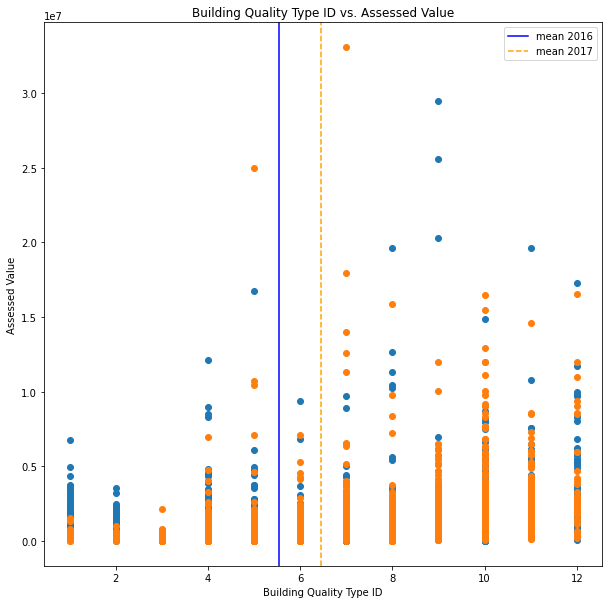

In [334]:
# Plot a histogram

plt.figure(figsize = (10,10))

plt.scatter(prop_2016_cleaned['buildingqualitytypeid'],prop_2016_cleaned['assessedvalue'])
plt.scatter(prop_2017_cleaned['buildingqualitytypeid'],prop_2017_cleaned['assessedvalue'])
plt.xlabel('Building Quality Type ID')
plt.ylabel('Assessed Value')
plt.title('Building Quality Type ID vs. Assessed Value')
plt.axvline(prop_2016_cleaned['buildingqualitytypeid'].mean(), label = 'mean 2016', c = 'blue')
plt.axvline(prop_2017_cleaned['buildingqualitytypeid'].mean(), label = 'mean 2017', c = 'orange', linestyle = '--')

plt.legend()
plt.show()

`fullbathcnt`:   Number of full bathrooms (sink, shower + bathtub, and toilet) present in a home

In [36]:
# Check the distribution

prop_2016_cleaned['fullbathcnt'].value_counts(normalize = True) * 100

2     49.557819
3     22.611550
1     19.760820
4      5.279378
5      1.621332
6      0.639823
7      0.284738
8      0.117245
9      0.056948
10     0.046898
12     0.010050
11     0.010050
15     0.003350
Name: fullbathcnt, dtype: float64

In [37]:
# Check the distribution

prop_2017_cleaned['fullbathcnt'].value_counts(normalize = True) * 100

2     49.648265
3     23.053732
1     19.372236
4      5.296128
5      1.517486
6      0.602975
7      0.217741
8      0.154094
9      0.083746
12     0.023449
10     0.023449
16     0.003350
11     0.003350
Name: fullbathcnt, dtype: float64

- The majority of the properties, <b>49%, have 2 full bathrooms.</b>
- The top 3 amount of full bathrooms in both years are 2, 3, and 1 at 49%, 23%, and 19% respectively.

`propertylandusetypeid`: Type of land use the property is zoned for

In [39]:
# Check the distribution

prop_2016_cleaned['propertylandusetypeid'].value_counts(normalize = True) * 100

261    72.614900
266    15.955380
246     3.788691
269     2.019965
263     2.013265
247     1.346643
248     1.272947
265     0.328286
31      0.294788
47      0.147394
260     0.097146
267     0.053598
275     0.046898
264     0.006700
270     0.003350
254     0.003350
146     0.003350
256     0.003350
Name: propertylandusetypeid, dtype: float64

In [40]:
# Check the distribution

prop_2017_cleaned['propertylandusetypeid'].value_counts(normalize = True) * 100

261    71.904730
266    16.561704
246     3.771942
269     2.093662
263     2.043414
248     1.403591
247     1.212649
265     0.321586
31      0.298137
47      0.157443
260     0.083746
267     0.070347
275     0.043548
156     0.020099
264     0.006700
270     0.003350
253     0.003350
Name: propertylandusetypeid, dtype: float64

- In both years, <b>72% of the properties are labeled as 261 or 'Single Family Residential'</b> while only 16% are labeled as 266 or 'Condominium'.

In [491]:
prop_2016_cleaned.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
count,2.985200e+04,29852.000000,29852.000000,29852.000000,29852.000000,29852.000000,29852.000000,2.985200e+04,2.985200e+04,2.985200e+04,...,29852.000000,29852.000000,29852.000000,2.985200e+04,2.985200e+04,29852.000000,2.985200e+04,29852.000000,29852.000000,2.985200e+04
mean,1.337037e+07,2.304402,3.216166,5.542945,1822.259380,1802.368284,2.239682,3.400298e+07,-1.182024e+08,2.160763e+04,...,6.244456,1.480504,1964.267620,1.719936e+05,4.231504e+05,2014.999464,2.522265e+05,5387.034627,51.722196,4.242201e+05
std,8.312874e+06,1.018100,1.140025,1.791388,1131.097479,1061.026524,1.010416,2.437164e+05,3.454912e+05,8.775587e+04,...,1.577234,1.120210,23.349705,2.431271e+05,6.236814e+05,0.023145,4.291761e+05,7606.279838,23.349362,6.238146e+05
min,1.071178e+07,1.000000,1.000000,1.000000,20.000000,20.000000,1.000000,3.334032e+07,-1.194478e+08,1.580000e+02,...,1.000000,1.000000,1821.000000,5.000000e+00,9.000000e+00,2014.000000,5.000000e+00,5.020000,1.000000,1.000000e+01
25%,1.163973e+07,2.000000,3.000000,4.000000,1214.000000,1210.000000,2.000000,3.382888e+07,-1.183952e+08,5.500000e+03,...,5.000000,1.000000,1950.000000,7.459325e+04,1.755150e+05,2015.000000,6.923375e+04,2442.090000,35.000000,1.760818e+05
50%,1.254678e+07,2.000000,3.000000,7.000000,1575.000000,1568.000000,2.000000,3.401012e+07,-1.181729e+08,6.912000e+03,...,6.000000,1.000000,1963.000000,1.219590e+05,3.030000e+05,2015.000000,1.636500e+05,4002.860000,53.000000,3.032500e+05
75%,1.409242e+07,3.000000,4.000000,7.000000,2127.000000,2130.000000,3.000000,3.416369e+07,-1.179484e+08,9.818000e+03,...,7.000000,2.000000,1981.000000,1.970318e+05,4.871678e+05,2015.000000,3.061530e+05,6172.520000,66.000000,4.875422e+05
max,1.681832e+08,15.000000,17.000000,12.000000,57508.000000,57508.000000,15.000000,3.481960e+07,-1.175587e+08,6.971010e+06,...,16.000000,118.000000,2015.000000,1.222854e+07,2.950293e+07,2015.000000,1.776675e+07,358313.720000,195.000000,2.950293e+07


In [490]:
# Check the distribution

prop_2016_cleaned['ageinyear'].describe()

count    29852.000000
mean        51.722196
std         23.349362
min          1.000000
25%         35.000000
50%         53.000000
75%         66.000000
max        195.000000
Name: ageinyear, dtype: float64

In [489]:
# Check the distribution

prop_2016_cleaned['yearbuilt'].describe()

count    29852.000000
mean      1964.267620
std         23.349705
min       1821.000000
25%       1950.000000
50%       1963.000000
75%       1981.000000
max       2015.000000
Name: yearbuilt, dtype: float64

`roomcnt`:  Total number of rooms in the principal residence

In [43]:
# Check the distribution

prop_2016_cleaned['roomcnt'].value_counts(normalize = True) * 100

6.0     18.739113
7.0     12.766314
5.0     11.429720
5.5     10.622404
8.0      9.215463
6.5      8.488543
4.0      6.200590
7.5      4.612756
4.5      4.063379
9.0      3.359909
8.5      2.890929
3.0      2.606191
9.5      1.500737
3.5      1.373442
10.0     0.830765
2.0      0.445531
11.0     0.231140
10.5     0.224441
11.5     0.180892
12.0     0.120595
13.0     0.050248
15.0     0.023449
2.5      0.006700
16.0     0.003350
14.0     0.003350
1.5      0.003350
1.0      0.003350
12.5     0.003350
Name: roomcnt, dtype: float64

In [43]:
# Check the distribution

prop_2017_cleaned['roomcnt'].value_counts(normalize = True) * 100

6.0     18.739113
7.0     12.766314
5.0     11.429720
5.5     10.622404
8.0      9.215463
6.5      8.488543
4.0      6.200590
7.5      4.612756
4.5      4.063379
9.0      3.359909
8.5      2.890929
3.0      2.606191
9.5      1.500737
3.5      1.373442
10.0     0.830765
2.0      0.445531
11.0     0.231140
10.5     0.224441
11.5     0.180892
12.0     0.120595
13.0     0.050248
15.0     0.023449
2.5      0.006700
16.0     0.003350
14.0     0.003350
1.5      0.003350
1.0      0.003350
12.5     0.003350
Name: roomcnt, dtype: float64

- In both year, <b>18.7% of the properties have 6 rooms in total.

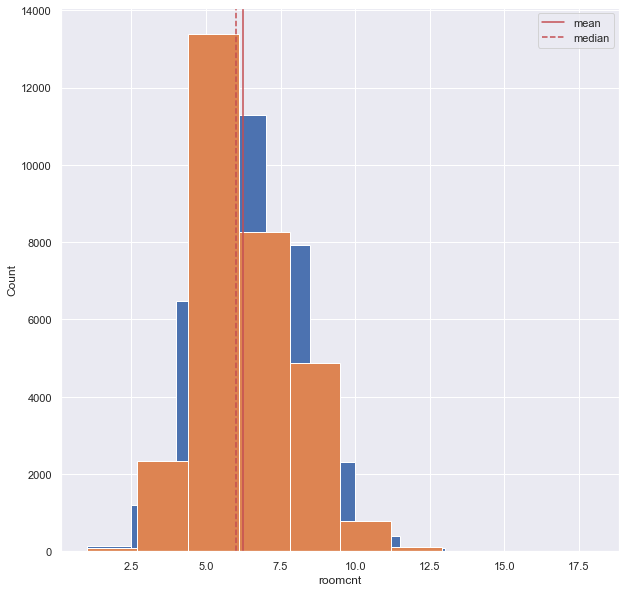

In [375]:
# Plot a histogram

plt.figure(figsize = (10,10))

plt.hist(prop_2016_cleaned['roomcnt'])
plt.hist(prop_2017_cleaned['roomcnt'])
plt.xlabel('roomcnt')
plt.ylabel('Count')
plt.axvline(prop_2016_cleaned['roomcnt'].mean(), label = 'mean', c = 'r')
plt.axvline(prop_2016_cleaned['roomcnt'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

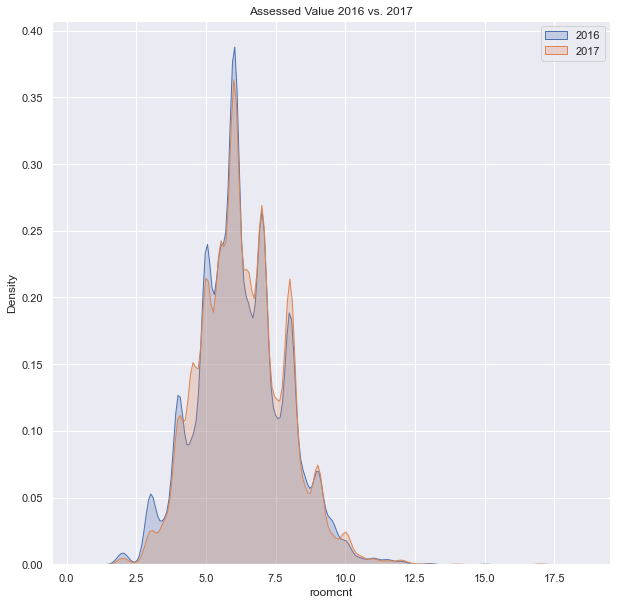

In [376]:
# Create a desity plot
# Set the maximum of the assessed value to $2,000,000
sns.set(rc={'figure.figsize':(10,10)})
sns.kdeplot(prop_2016_cleaned['roomcnt'], label = '2016', shade = True)
sns.kdeplot(prop_2017_cleaned['roomcnt'], label = '2017',shade = True)
plt.title('Room Count 2016 vs. 2017')
plt.legend()
plt.show;

`calculatedfinishedsquarefeet`:  Calculated total finished living area of the home 

In [49]:
# Summary statistics

prop_2016_cleaned['calculatedfinishedsquarefeet'].describe()

count    29852.000000
mean      1822.259380
std       1131.097479
min         20.000000
25%       1214.000000
50%       1575.000000
75%       2127.000000
max      57508.000000
Name: calculatedfinishedsquarefeet, dtype: float64

- The average finished living area is <b>1822 sqft.</b>
- However, the minimum is only 20 sqft. which seems to be an outliner or record error.

`yearbuilt`: The Year the principal residence was built 

In [75]:
# Summary statistics

prop_2016_cleaned['yearbuilt'].describe()

count    29852.000000
mean      1964.267620
std         23.349705
min       1821.000000
25%       1950.000000
50%       1963.000000
75%       1981.000000
max       2015.000000
Name: yearbuilt, dtype: float64

- The average of the year that the properties were built is <b>1964</b>.
- The oldest properties were built in 1821 while the newest ones were built in 2015.

`ageinyear`: The Year the principal residence was built to the inspection year

In [76]:
# Summary statistics

prop_2016_cleaned['ageinyear'].describe()

count    29852.000000
mean        51.722196
std         23.349362
min          1.000000
25%         35.000000
50%         53.000000
75%         66.000000
max        195.000000
Name: ageinyear, dtype: float64

In [377]:
# Summary statistics

prop_2017_cleaned['ageinyear'].describe()

count    29852.000000
mean        52.409420
std         23.566737
min          2.000000
25%         35.000000
50%         54.000000
75%         67.000000
max        133.000000
Name: ageinyear, dtype: float64

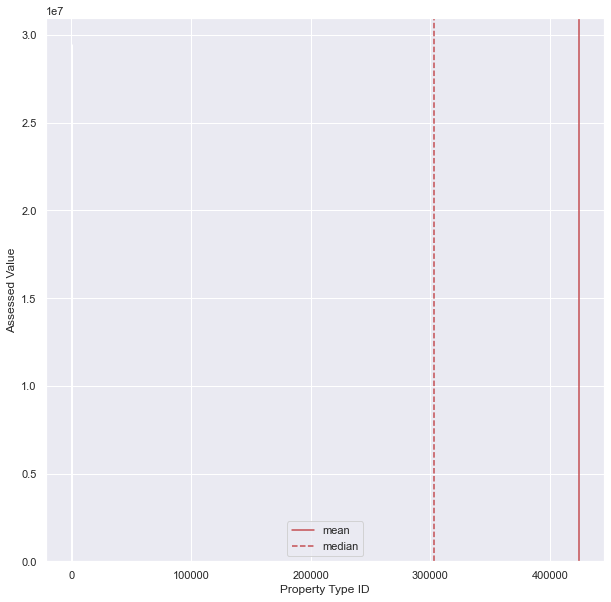

In [480]:
# Plot a histogram

plt.figure(figsize = (10,10))

plt.bar(prop_2016_cleaned['propertylandusetypeid'],prop_2016_cleaned['assessedvalue'])
plt.xlabel('Property Type ID')
plt.ylabel('Assessed Value')
plt.axvline(prop_2016_cleaned['assessedvalue'].mean(), label = 'mean', c = 'r')
plt.axvline(prop_2016_cleaned['assessedvalue'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

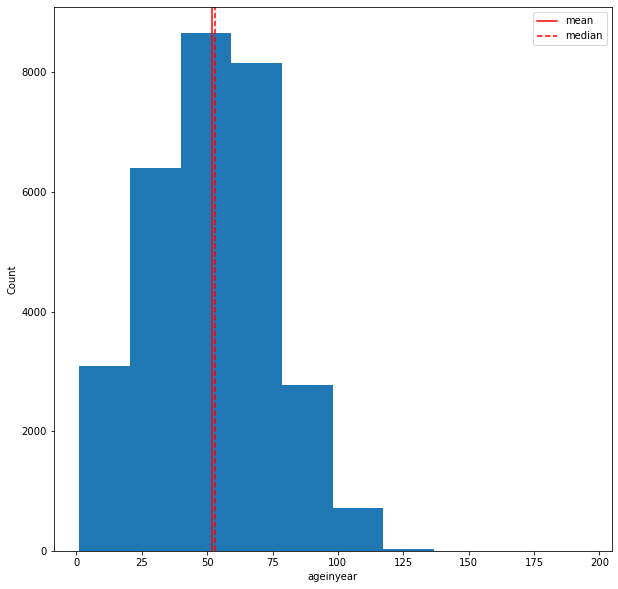

In [340]:
# Plot a histogram

plt.figure(figsize = (10,10))

plt.hist(prop_2016_cleaned['ageinyear'])
plt.xlabel('ageinyear')
plt.ylabel('Count')
plt.axvline(prop_2016_cleaned['ageinyear'].mean(), label = 'mean', c = 'r')
plt.axvline(prop_2016_cleaned['ageinyear'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

- The average age of the properties is <b>52 years old</b>.
- The oldest properties are 195 years old while the newest ones are 1 year old.

`assessedvalue`: The sum of the assessed value of the built structure on the parcel and the assessed value of the land area of the parcel

In [84]:
# Summary statistics

prop_2016_cleaned['assessedvalue'].describe()

count    2.985200e+04
mean     4.242201e+05
std      6.238146e+05
min      1.000000e+01
25%      1.760818e+05
50%      3.032500e+05
75%      4.875422e+05
max      2.950293e+07
Name: assessedvalue, dtype: float64

In [80]:
# Mean

prop_2016_cleaned['assessedvalue'].mean()

424220.1167760954

In [445]:
# Mean

prop_2017_cleaned['assessedvalue'].mean()

442784.32836995844

In [450]:
(29502930 + 33095400) / 2

31299165.0

In [81]:
# Median

prop_2016_cleaned['assessedvalue'].median()

303250.0

In [447]:
# Median

prop_2017_cleaned['assessedvalue'].median()

319259.0

In [82]:
# Minimum

prop_2016_cleaned['assessedvalue'].min()

10.0

In [379]:
# Minimum

prop_2017_cleaned['assessedvalue'].min()

10.0

In [83]:
# Maximum

prop_2016_cleaned['assessedvalue'].max()

29502930.0

In [449]:
# Maximum

prop_2017_cleaned['assessedvalue'].max()

33095400.0

- The average assessed value of the properties is <b>\\$424,220.12</b>.
- The median assessed value of the properties is <b>\\$303,250</b>.
- The highest assessed value of the properties is <b>\\$29,502,930</b>.
- However, the minimum is only \\$10 which seems to be an outliner or record error.

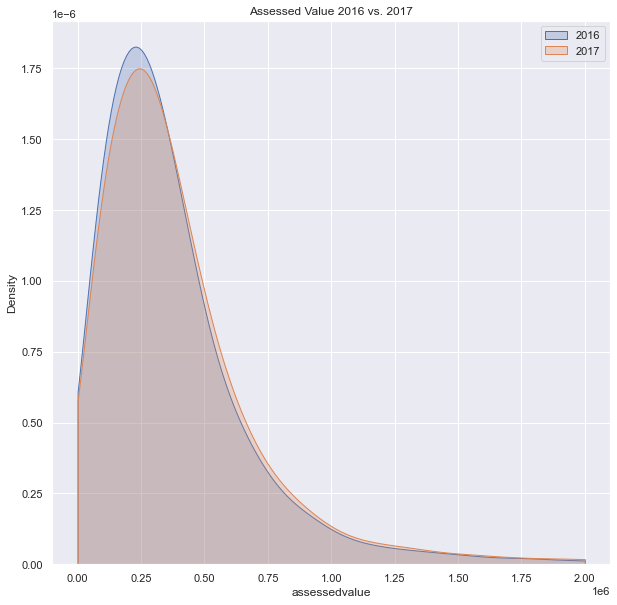

In [369]:
# Create a desity plot
# Set the maximum of the assessed value to $2,000,000
sns.set(rc={'figure.figsize':(10,10)})
sns.kdeplot(prop_2016_cleaned['assessedvalue'], label = '2016', shade = True, clip=(0.0, 2000000.0))
sns.kdeplot(prop_2017_cleaned['assessedvalue'], label = '2017',shade = True, clip=(0.0, 2000000.0))
plt.title('Assessed Value 2016 vs. 2017')
plt.legend()
plt.show;

In [451]:
prop_2016_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


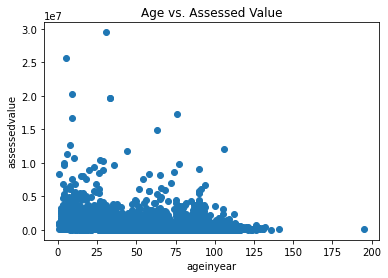

In [92]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['ageinyear'],prop_2016_cleaned['assessedvalue'])
plt.title('Age vs. Assessed Value')
plt.xlabel('ageinyear')
plt.ylabel('assessedvalue')

plt.show()

ValueError: `bins` must increase monotonically, when an array

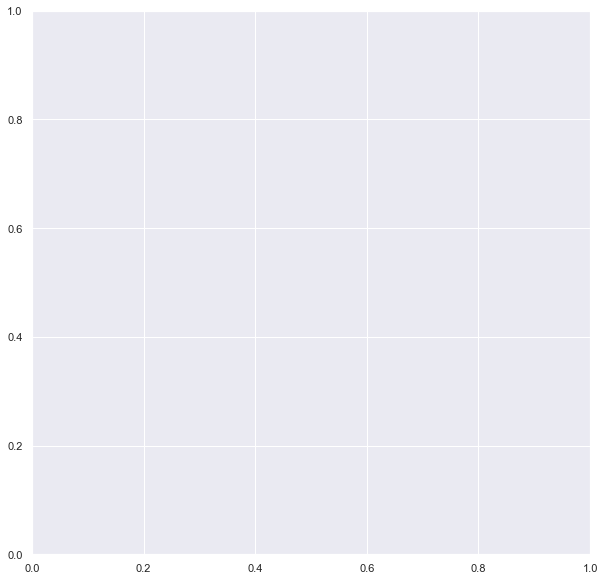

In [372]:
# Plot a histogram

plt.figure()

plt.hist(prop_2016_cleaned['calculatedfinishedsquarefeet'])
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Count')
plt.axvline(prop_2016_cleaned['calculatedfinishedsquarefeet'].mean(), label = 'mean', c = 'r')
plt.axvline(prop_2016_cleaned['calculatedfinishedsquarefeet'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

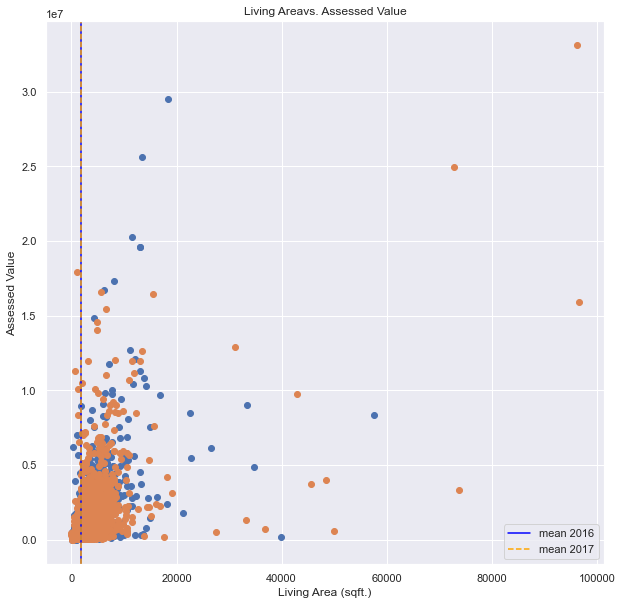

In [373]:
# Plot a histogram

plt.figure(figsize = (10,10))

plt.scatter(prop_2016_cleaned['calculatedfinishedsquarefeet'],prop_2016_cleaned['assessedvalue'])
plt.scatter(prop_2017_cleaned['calculatedfinishedsquarefeet'],prop_2017_cleaned['assessedvalue'])
plt.xlabel('Living Area (sqft.)')
plt.ylabel('Assessed Value')
plt.title('Living Areavs. Assessed Value')
plt.axvline(prop_2016_cleaned['calculatedfinishedsquarefeet'].mean(), label = 'mean 2016', c = 'blue')
plt.axvline(prop_2017_cleaned['calculatedfinishedsquarefeet'].mean(), label = 'mean 2017', c = 'orange', linestyle = '--')

plt.legend()
plt.show()

#### Explore the relationship between Map (Lat & Lon) and assessedvalue

In [63]:
# Import geopandas

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
CA_Counties_TIGER2016.shp

In [66]:
# Import the .shp file of the map
# Source: 

map_view = gpd.read_file('CA_Counties_TIGER2016.shp')

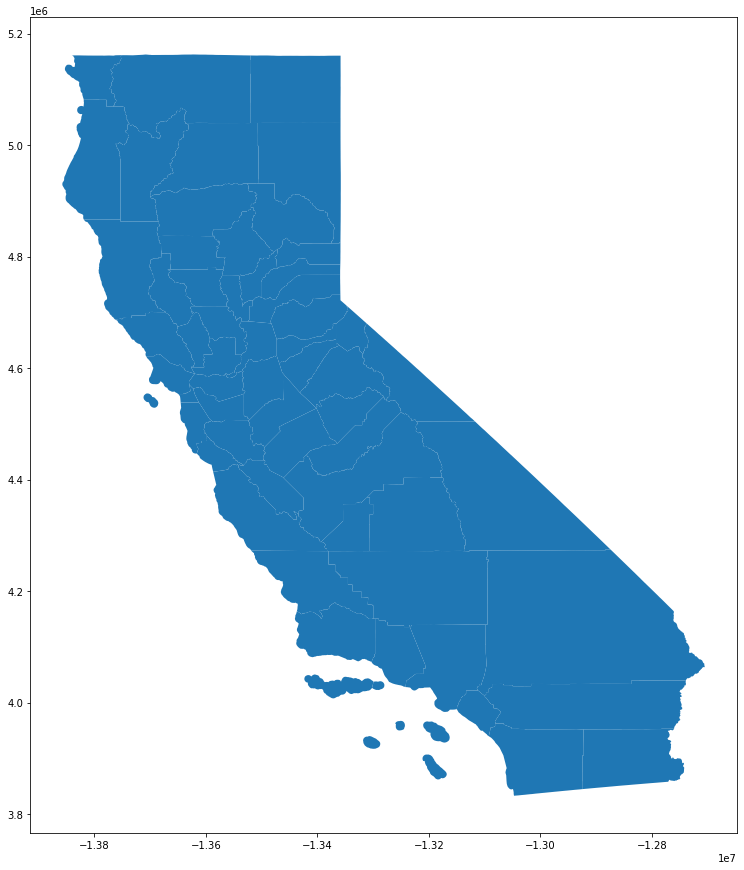

In [68]:
# Plot the map layout

fig,ax = plt.subplots(figsize = (15, 15))
map_view.plot(ax = ax);

In [69]:
# Plot the map using 'Lon' and 'Lat'

crs = {'init': 'epsg:4326'}

# Assign 'geometry' in a zap file format
geometry = [Point(xy) for xy in zip(prop_2016_cleaned['longitude'], prop_2016_cleaned['latitude'])]
geometry[:3]

[<POINT (-1.18e+08 3.39e+07)>,
 <POINT (-1.18e+08 3.41e+07)>,
 <POINT (-1.18e+08 3.4e+07)>]

In [70]:
# Assign 'geo' to the dataframe above

geo = gpd.GeoDataFrame(prop_2016_cleaned, crs = crs, geometry = geometry)

geo.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue,geometry
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0,POINT (-117810249.000 33895719.000)
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0,POINT (-118049425.000 34112701.000)
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0,POINT (-117853204.000 33983059.000)
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0,POINT (-118078964.000 33793770.000)
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0,POINT (-117898743.000 33634633.000)


In [455]:
print(prop_2016_cleaned[prop_2016_cleaned.assessedvalue == 303250.0])

Empty DataFrame
Columns: [parcelid, bathroomcnt, bedroomcnt, buildingqualitytypeid, calculatedfinishedsquarefeet, finishedsquarefeet12, fullbathcnt, latitude, longitude, lotsizesquarefeet, propertylandusetypeid, regionidcity, regionidcounty, regionidzip, roomcnt, unitcnt, yearbuilt, structuretaxvaluedollarcnt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount, ageinyear, assessedvalue]
Index: []

[0 rows x 24 columns]


#### Most expensive properties

In [436]:
print(prop_2016_cleaned[prop_2016_cleaned.assessedvalue == prop_2016_cleaned.assessedvalue.max()])

       parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
28314  11645399         15.0           6                      9   

       calculatedfinishedsquarefeet  finishedsquarefeet12  fullbathcnt  \
28314                       18417.0               18417.0           15   

         latitude    longitude  lotsizesquarefeet  ...  roomcnt  unitcnt  \
28314  34089389.0 -118438686.0            96675.0  ...     10.0      1.0   

       yearbuilt  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
28314       1985                  12228543.0         29502930.0   

       assessmentyear  landtaxvaluedollarcnt  taxamount  ageinyear  \
28314            2015             17274387.0  358313.72         31   

       assessedvalue  
28314     29502930.0  

[1 rows x 24 columns]


In [456]:
print(prop_2016_cleaned[prop_2016_cleaned.assessedvalue == prop_2016_cleaned.assessedvalue.median()])

Empty DataFrame
Columns: [parcelid, bathroomcnt, bedroomcnt, buildingqualitytypeid, calculatedfinishedsquarefeet, finishedsquarefeet12, fullbathcnt, latitude, longitude, lotsizesquarefeet, propertylandusetypeid, regionidcity, regionidcounty, regionidzip, roomcnt, unitcnt, yearbuilt, structuretaxvaluedollarcnt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount, ageinyear, assessedvalue]
Index: []

[0 rows x 24 columns]


In [437]:
print(prop_2016_cleaned[prop_2016_cleaned.assessedvalue == prop_2016_cleaned.assessedvalue.min()])

      parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
7149  12053990          1.0           1                      5   

      calculatedfinishedsquarefeet  finishedsquarefeet12  fullbathcnt  \
7149                          20.0                  20.0            1   

        latitude    longitude  lotsizesquarefeet  ...  roomcnt  unitcnt  \
7149  34172100.0 -118294000.0             8092.0  ...      4.0      1.0   

      yearbuilt  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
7149       1990                         5.0               10.0   

      assessmentyear  landtaxvaluedollarcnt  taxamount  ageinyear  \
7149            2015                    5.0    3233.33         26   

      assessedvalue  
7149           10.0  

[1 rows x 24 columns]


In [381]:
print(prop_2017_cleaned[prop_2017_cleaned.assessedvalue == prop_2017_cleaned.assessedvalue.max()])

       parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
24021  11659692          5.5           5                      7   

       calculatedfinishedsquarefeet  finishedsquarefeet12  fullbathcnt  \
24021                       96283.0                8468.0            5   

         latitude    longitude  lotsizesquarefeet  ...  roomcnt  unitcnt  \
24021  34053172.0 -118469334.0            67417.0  ...      2.0     34.5   

       yearbuilt  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
24021       1988                  20366402.0         33095400.0   

       assessmentyear  landtaxvaluedollarcnt  taxamount  ageinyear  \
24021            2016             12728998.0  400807.97         29   

       assessedvalue  
24021     33095400.0  

[1 rows x 24 columns]


In [71]:
# Import make_axes_locatable

from mpl_toolkits.axes_grid1 import make_axes_locatable

ValueError: aspect must be finite and positive 

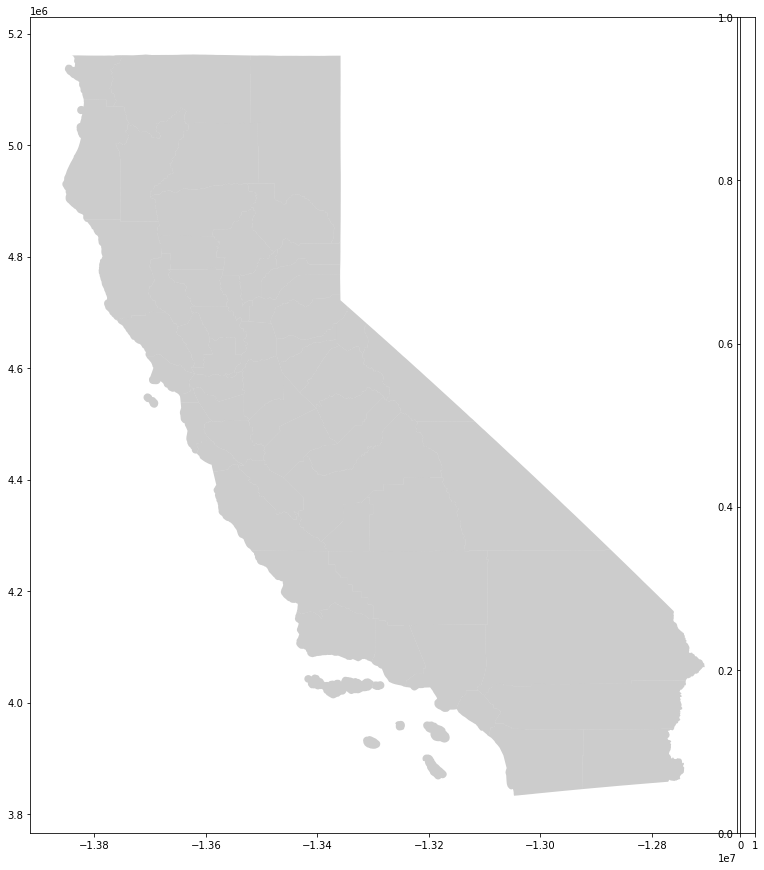

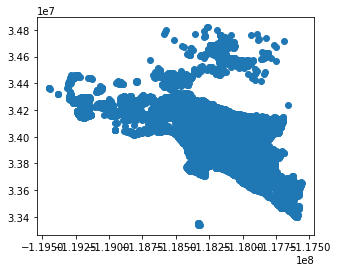

In [309]:
# Plot 'assessedvalue' on the map

# Size of the map
fig,ax = plt.subplots(figsize = (15, 15))
geo.plot(aspect=1)
# Plot the map
map_view.plot(ax = ax, alpha = 0.4, color = 'grey')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "2%", pad = "0.5%")
geo.plot(column = 'assessedvalue', label = 'assessedvalue', ax = ax, legend = True)
plt.legend(prop = {'size': 15});

#### Drop `geometry` from the datasets after ploting a map

In [154]:
prop_2016_cleaned.drop(['geometry'], axis = 1, inplace = True)

In [155]:
prop_2016_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


#### Distribution of all columns

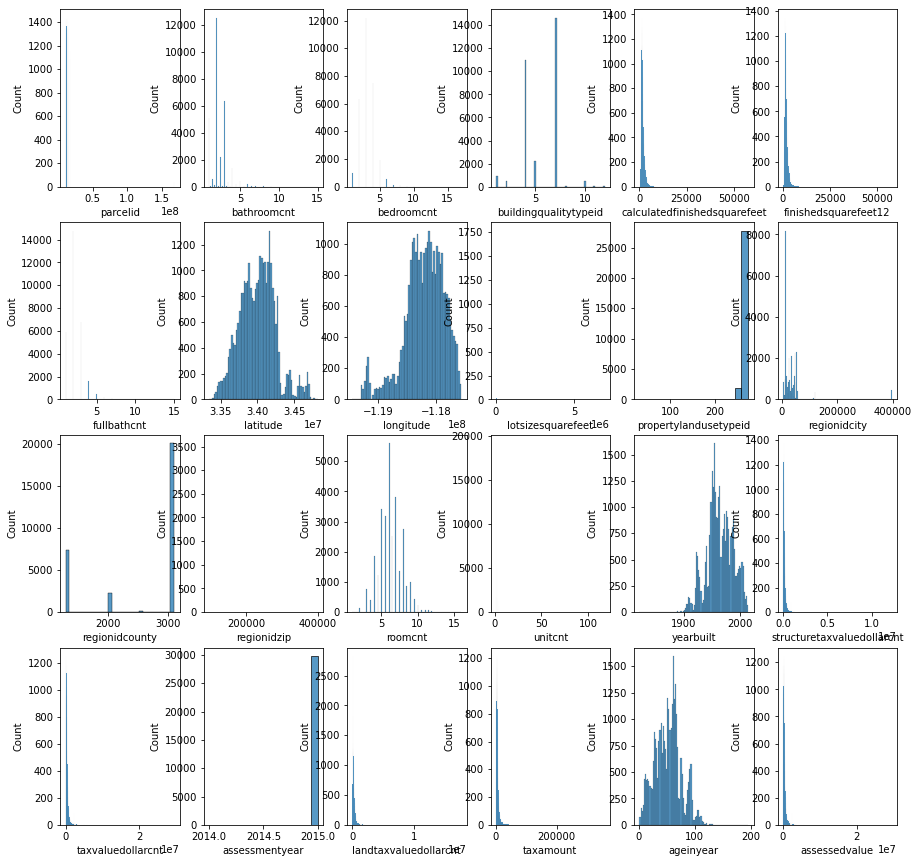

In [156]:
# Plot distribution of all columns

plt.subplots(4, 6, figsize = (15, 15))

counter = 1

for col in list(prop_2016_cleaned):
    plt.subplot(4, 6, counter)
    sns.histplot(prop_2016_cleaned[col])
    
    counter+=1

- According to the plots, `roomcnt`, `yearbuilt` and ` ageinyear` seem to be normally distributed.

#### Pair plot

In [ ]:
sns.pairplot(prop_2016_cleaned)

#### Median home value with respect to location

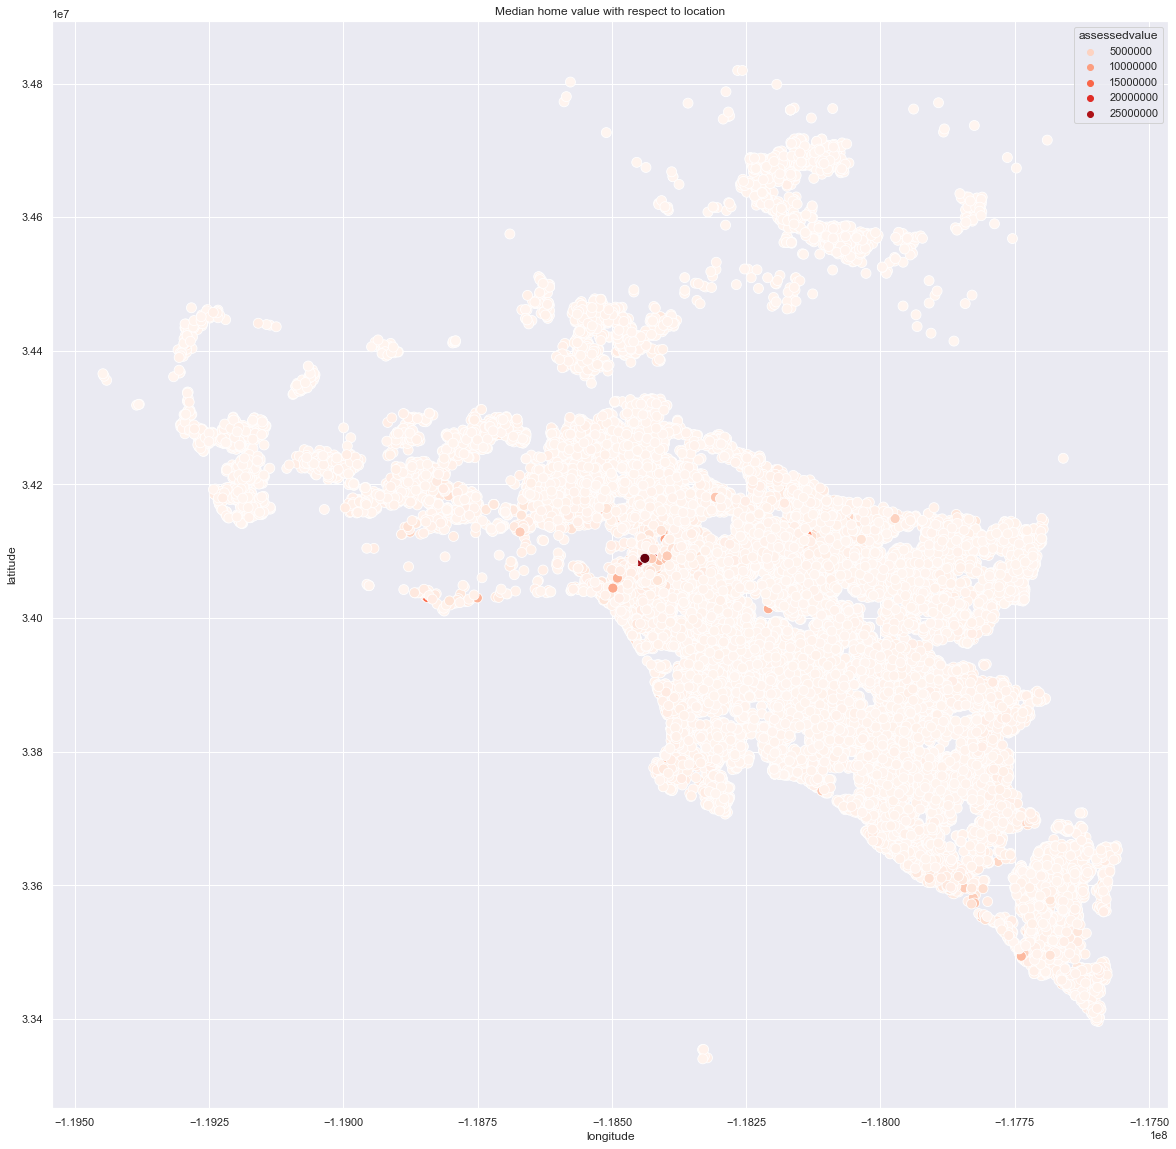

In [433]:
plt.figure(figsize=(20, 20))

sns.scatterplot(data=prop_2016_cleaned, x="longitude", y="latitude", hue="assessedvalue", palette="Reds", alpha=1, s = 100)
plt.title("Median home value with respect to location")
plt.show()

## Data Preprocessing

In [157]:
# Instantiate the independent and dependent variables 

# Independent variables / features
X = prop_2016_cleaned.drop(columns = 'assessedvalue')

# Dependent variable / target
y = prop_2016_cleaned['assessedvalue']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

- test_size = 0.3: represents 30% of the data
- random_state = 1: ensures to get reproducible results

In [158]:
# Shape of the features

X_train.shape

(20896, 23)

In [159]:
# Shape of the target

y_train.shape

(20896,)

## Data Modeling

## Linear Regression

In [ ]:
from sklearn.metrics import explained_variance_score

In [396]:
# Linear regression

# Instantiate model
lr_model = LinearRegression()

# Fit model
lr_model.fit(X_train, y_train)
predict_lr = lr_model.predict(X_test)

# Score model
lr_score_train = lr_model.score(X_train,y_train)
lr_score = lr_model.score(X_test, y_test)
exp_lr = explained_variance_score(predict_lr, y_test)

# Evaluate model
lr_r2mse = r2(y_test, predict_lr)
lr_mse = MSE(y_test, predict_lr)
lr_mae = MAE(y_test, predict_lr)

In [397]:
# Print the results

print(f"Train score: {lr_score_train}")
print(f"Test score: {lr_score}")
print(f"EV score: {exp_lr}")
print(f"Rsquare: {lr_r2mse}")
print(f"MSE: {lr_mse}")
print(f"MAE: {lr_mae}")

Train score: 1.0
Test score: 1.0
EV score: 1.0
Rsquare: 1.0
RMSE: 2.6736249481043447e-16
MAE: 4.034233706561783e-09


In [461]:
from sklearn.metrics import accuracy_score

test_lr = accuracy_score(y_test,predict_lr)
test_lr

ValueError: continuous is not supported

In [462]:
list(prop_2016_cleaned.columns)

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'ageinyear',
 'assessedvalue']

In [463]:
prop_2016_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


In [466]:
prop_2016_cleaned['lotsizesquarefeet'].median()

6912.000000000002

In [476]:
# Instantiate the independent and dependent variables 

# Independent variables / features
A = prop_2016_cleaned[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]

# Dependent variable / target
b = prop_2016_cleaned['assessedvalue']

# Split the data into train and test sets
A_train, A_test, b_train, b_test = train_test_split(A,
                                                    b, 
                                                    test_size = 0.3, 
                                                    random_state = 1)


# Linear regression

# Instantiate model
ab_lr_model = LinearRegression()

# Fit model
ab_lr_model.fit(A_train, b_train)
ab_predict_lr = ab_lr_model.predict(A_test)

# Score model
ab_lr_score_train = ab_lr_model.score(A_train,b_train)
ab_lr_score = ab_lr_model.score(A_test, b_test)
ab_exp_lr = explained_variance_score(ab_predict_lr, b_test)

# Evaluate model
ab_lr_r2mse = r2(y_test, predict_lr)
ab_lr_mse = MSE(y_test, predict_lr)
ab_lr_mae = MAE(y_test, predict_lr)

# predict_model = ab_lr_model.predict([2,2,1500])
# predict_model

In [471]:
# Print the results

print(f"Train score: {ab_lr_score_train}")
print(f"Test score: {ab_lr_score}")
print(f"EV score: {ab_exp_lr}")
print(f"Rsquare: {ab_lr_r2mse}")
print(f"RMSE: {ab_lr_mse}")
print(f"MAE: {ab_lr_mae}")

Train score: 0.23060076586331968
Test score: 0.2537972710147518
EV score: -2.6335657458629167
Rsquare: 1.0
RMSE: 2.6736249481043447e-16
MAE: 4.034233706561783e-09


In [477]:
predict_model = ab_lr_model.predict([[2,2,1500]])
predict_model

array([436308.33521156])

In [478]:
predict_model_2 = ab_lr_model.predict([[3,3,2000]])
predict_model_2

array([584687.88686448])

In [479]:
prop_2016_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


`ageinyear` vs. `assessedvalue`

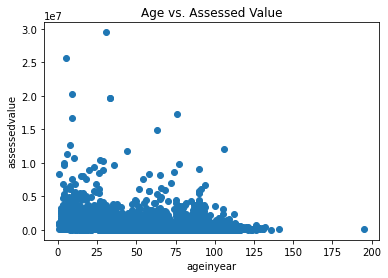

In [98]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['ageinyear'], prop_2016_cleaned['assessedvalue'])
plt.title('Age vs. Assessed Value')
plt.xlabel('ageinyear')
plt.ylabel('assessedvalue')

plt.show()

-  There are some outliners where a property is close to 200 years old and some of the properties that are extremely high in assessed value.

`buildingqualitytypeid` vs. `assessedvalue`

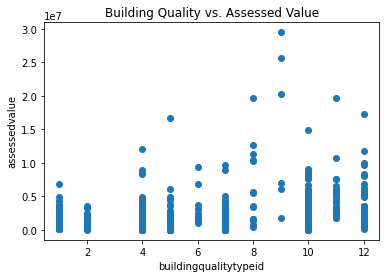

In [99]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['buildingqualitytypeid'], prop_2016_cleaned['assessedvalue'])
plt.title('Building Quality vs. Assessed Value')
plt.xlabel('buildingqualitytypeid')
plt.ylabel('assessedvalue')

plt.show()

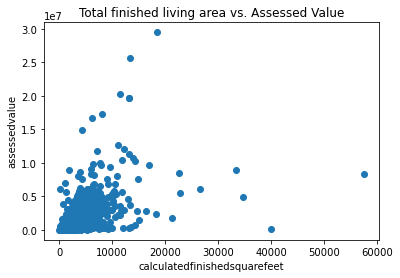

In [100]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['calculatedfinishedsquarefeet'], prop_2016_cleaned['assessedvalue'])
plt.title('Total finished living area vs. Assessed Value')
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('assessedvalue')

plt.show()

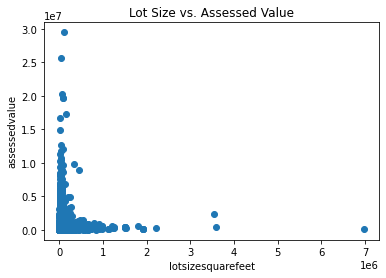

In [101]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['lotsizesquarefeet'], prop_2016_cleaned['assessedvalue'])
plt.title('Lot Size vs. Assessed Value')
plt.xlabel('lotsizesquarefeet')
plt.ylabel('assessedvalue')

plt.show()

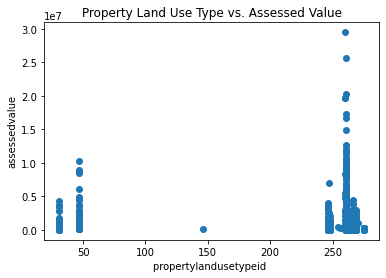

In [103]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['propertylandusetypeid'], prop_2016_cleaned['assessedvalue'])
plt.title('Property Land Use Type vs. Assessed Value')
plt.xlabel('propertylandusetypeid ')
plt.ylabel('assessedvalue')

plt.show()

- The properties with the property land use type greater than 250 tend to have higher assessed values.

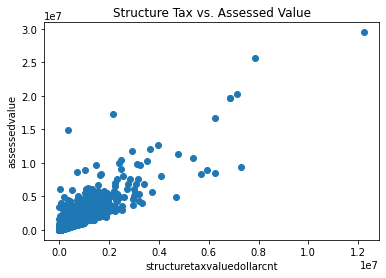

In [104]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['structuretaxvaluedollarcnt'], prop_2016_cleaned['assessedvalue'])
plt.title('Structure Tax vs. Assessed Value')
plt.xlabel('structuretaxvaluedollarcnt')
plt.ylabel('assessedvalue')

plt.show()

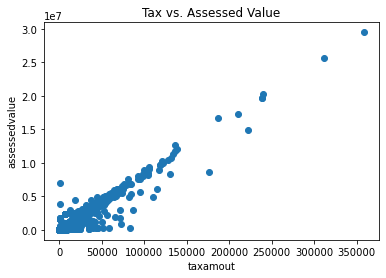

In [105]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['taxamount'], prop_2016_cleaned['assessedvalue'])
plt.title('Tax vs. Assessed Value')
plt.xlabel('taxamout')
plt.ylabel('assessedvalue')

plt.show()

## Correlation

#### The correlation between `assessedvalue` and the predictor columns

In [160]:
prop_2016_cleaned.corr()['assessedvalue'].sort_values(ascending=False)

assessedvalue                   1.000000
taxvaluedollarcnt               0.999737
landtaxvaluedollarcnt           0.960358
taxamount                       0.954803
structuretaxvaluedollarcnt      0.870541
finishedsquarefeet12            0.588797
calculatedfinishedsquarefeet    0.573069
bathroomcnt                     0.477159
fullbathcnt                     0.457647
roomcnt                         0.330279
bedroomcnt                      0.224450
yearbuilt                       0.159407
parcelid                        0.151226
unitcnt                         0.027667
regionidzip                     0.026091
lotsizesquarefeet               0.011730
assessmentyear                 -0.018094
regionidcounty                 -0.023523
regionidcity                   -0.027171
buildingqualitytypeid          -0.029635
longitude                      -0.040742
propertylandusetypeid          -0.054284
latitude                       -0.058159
ageinyear                      -0.159805
Name: assessedva

- <b>`taxvaluedollarcnt` shows the highest positive correlation at 0.9997</b>, followed by `landtaxvaluedollarcnt`, `taxamount`,and `structuretaxvaluedollarcnt`.
- <b>`ageinyear` and `longitude` show the weakest negative correlation</b> approximately below -0.05.

`taxvaluedollarcnt`

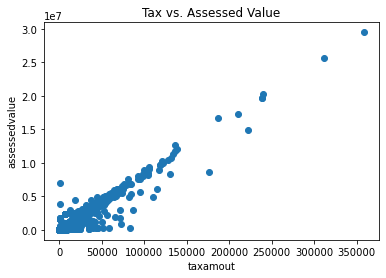

In [105]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['taxamount'], prop_2016_cleaned['assessedvalue'])
plt.title('Tax vs. Assessed Value')
plt.xlabel('taxamout')
plt.ylabel('assessedvalue')

plt.show()

`landtaxvaluedollarcnt`

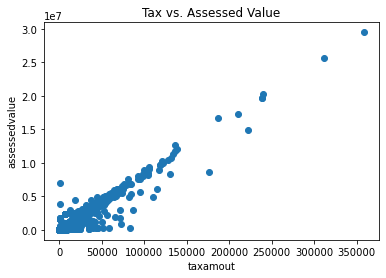

In [105]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['taxamount'], prop_2016_cleaned['assessedvalue'])
plt.title('Tax vs. Assessed Value')
plt.xlabel('taxamout')
plt.ylabel('assessedvalue')

plt.show()

`taxamount`

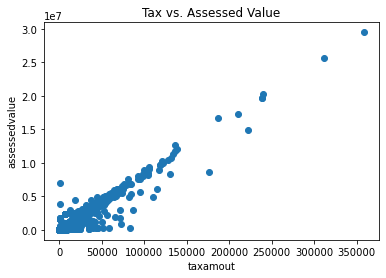

In [105]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['taxamount'], prop_2016_cleaned['assessedvalue'])
plt.title('Tax vs. Assessed Value')
plt.xlabel('taxamout')
plt.ylabel('assessedvalue')

plt.show()

`structuretaxvaluedollarcnt`

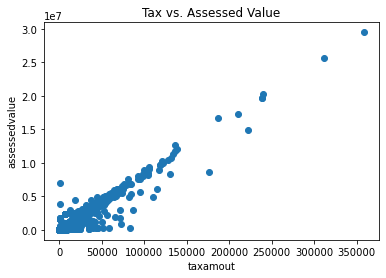

In [105]:
# Create a scatter plot

plt.figure()

plt.scatter(prop_2016_cleaned['taxamount'], prop_2016_cleaned['assessedvalue'])
plt.title('Tax vs. Assessed Value')
plt.xlabel('taxamout')
plt.ylabel('assessedvalue')

plt.show()

#### Independence or No Multicollienearity

Another important assumption when building a linear regression is that there is no collinearity: the predictor variables are independent of each other.

In [161]:
# Use corr() to display a correlation matrix of the dataset
# Correlation between independent variables

X_corr = X.corr()

X_corr

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear
parcelid,1.000000,-0.029277,-0.006136,-0.075293,-0.002521,-0.023889,-0.077355,-0.025616,-0.083849,-0.013941,...,0.013571,0.046876,0.046349,0.072617,0.156337,0.150536,-0.178445,0.131246,-0.000371,-0.074742
bathroomcnt,-0.029277,1.000000,0.638447,-0.255893,0.742656,0.735810,0.985326,0.020796,-0.029290,0.020120,...,0.015415,0.568308,0.175686,0.355639,0.574355,0.477377,0.004081,0.368188,0.486721,-0.355541
bedroomcnt,-0.006136,0.638447,1.000000,-0.045235,0.578695,0.556049,0.635193,0.027406,-0.007376,-0.094391,...,0.005453,0.598793,0.244068,0.054979,0.282438,0.225133,-0.004496,0.166241,0.234516,-0.054892
buildingqualitytypeid,-0.075293,-0.255893,-0.045235,1.000000,-0.153076,-0.170755,-0.232970,-0.023166,0.070732,-0.067122,...,-0.039151,-0.244796,-0.021727,-0.482815,-0.092308,-0.029382,-0.011564,0.009218,-0.014221,0.482817
calculatedfinishedsquarefeet,-0.002521,0.742656,0.578695,-0.153076,1.000000,0.976717,0.722238,0.002200,-0.021512,-0.021019,...,0.017668,0.537764,0.245614,0.194077,0.693520,0.573351,0.002685,0.440089,0.589920,-0.194049
finishedsquarefeet12,-0.023889,0.735810,0.556049,-0.170755,0.976717,1.000000,0.714745,0.000889,-0.018214,-0.021442,...,0.020039,0.576188,0.204160,0.214220,0.702744,0.589005,0.006169,0.457724,0.606577,-0.214132
fullbathcnt,-0.077355,0.985326,0.635193,-0.232970,0.722238,0.714745,1.000000,0.062765,-0.048257,0.028054,...,0.011915,0.547826,0.142670,0.313227,0.553201,0.458139,0.004061,0.351810,0.476092,-0.312964
latitude,-0.025616,0.020796,0.027406,-0.023166,0.002200,0.000889,0.062765,1.000000,-0.576272,0.113921,...,0.006251,-0.002973,-0.229419,0.006198,0.014265,-0.058330,-0.012547,-0.092616,-0.041917,-0.006167
longitude,-0.083849,-0.029290,-0.007376,0.070732,-0.021512,-0.018214,-0.048257,-0.576272,1.000000,-0.074791,...,0.028515,0.037793,0.086524,0.048012,-0.070365,-0.040353,0.002742,-0.019358,-0.032870,-0.047897
lotsizesquarefeet,-0.013941,0.020120,-0.094391,-0.067122,-0.021019,-0.021442,0.028054,0.113921,-0.074791,1.000000,...,0.010034,-0.072080,-0.063594,0.113703,0.027786,0.011654,0.002199,0.001309,0.012437,-0.113725


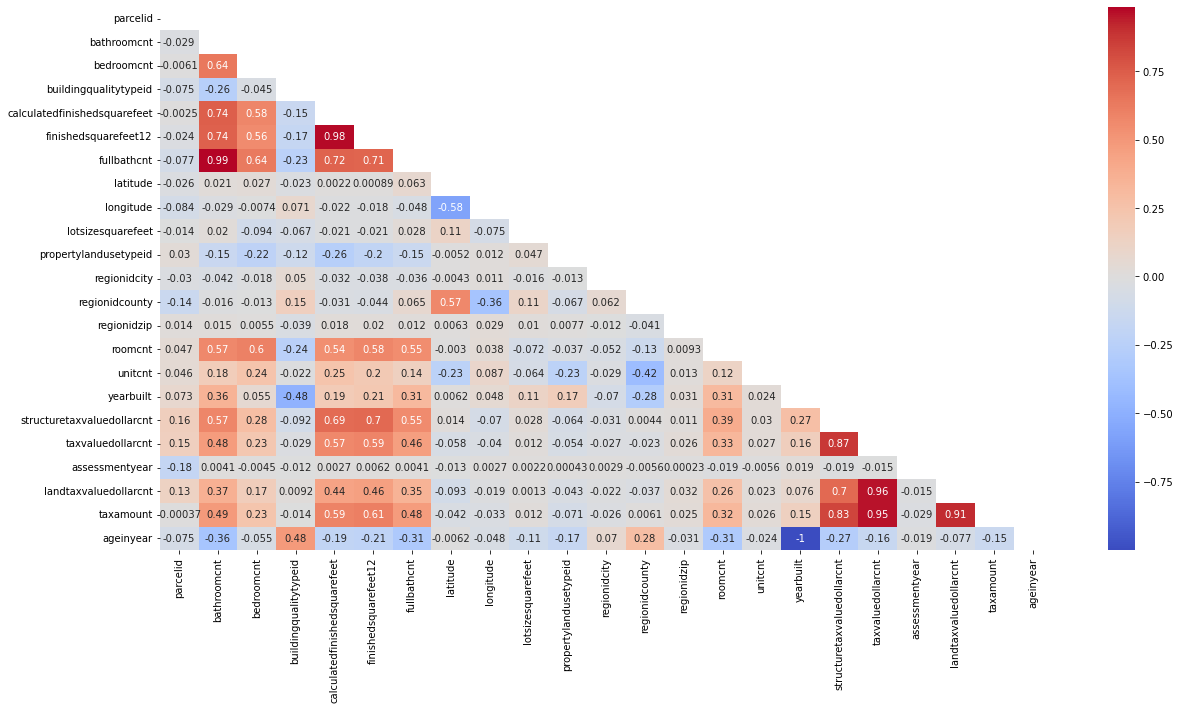

In [108]:
# Correlation of the variables in a heatmap

plt.figure(figsize=(20, 10))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

- As we can see, there are some strong collinearlity between the features in ths dataset.

In [109]:
# Correlations with 'assessedvalue' (y variable)
y_corr = prop_2016_cleaned.corr()
y_corr['assessedvalue'].sort_values()

ageinyear                      -0.159805
latitude                       -0.058159
propertylandusetypeid          -0.054284
longitude                      -0.040742
buildingqualitytypeid          -0.029635
regionidcity                   -0.027171
regionidcounty                 -0.023523
assessmentyear                 -0.018094
lotsizesquarefeet               0.011730
regionidzip                     0.026091
unitcnt                         0.027667
parcelid                        0.151226
yearbuilt                       0.159407
bedroomcnt                      0.224450
roomcnt                         0.330279
fullbathcnt                     0.457647
bathroomcnt                     0.477159
calculatedfinishedsquarefeet    0.573069
finishedsquarefeet12            0.588797
structuretaxvaluedollarcnt      0.870541
taxamount                       0.954803
landtaxvaluedollarcnt           0.960358
taxvaluedollarcnt               0.999737
assessedvalue                   1.000000
Name: assessedva

<Axes: >

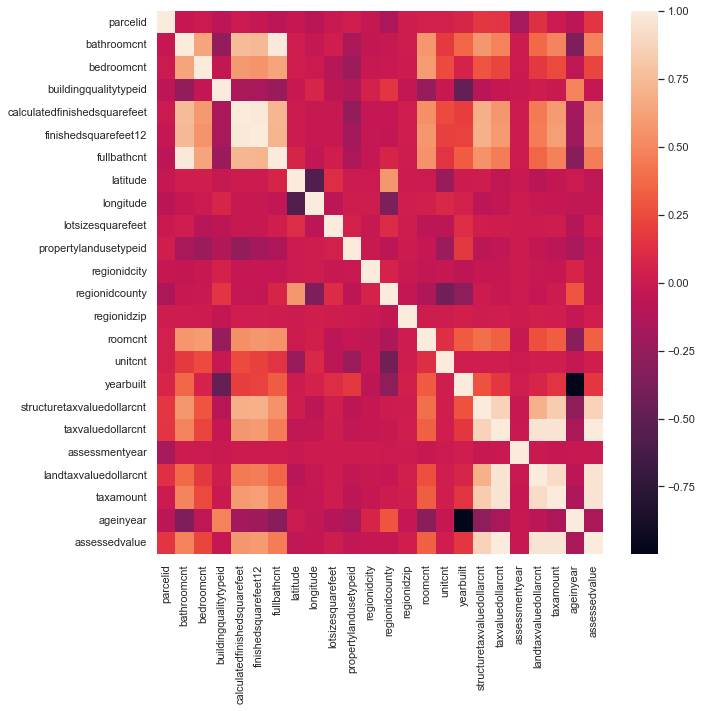

In [438]:
# Heatmap

sns.heatmap(prop_2016_cleaned.corr())

<Axes: >

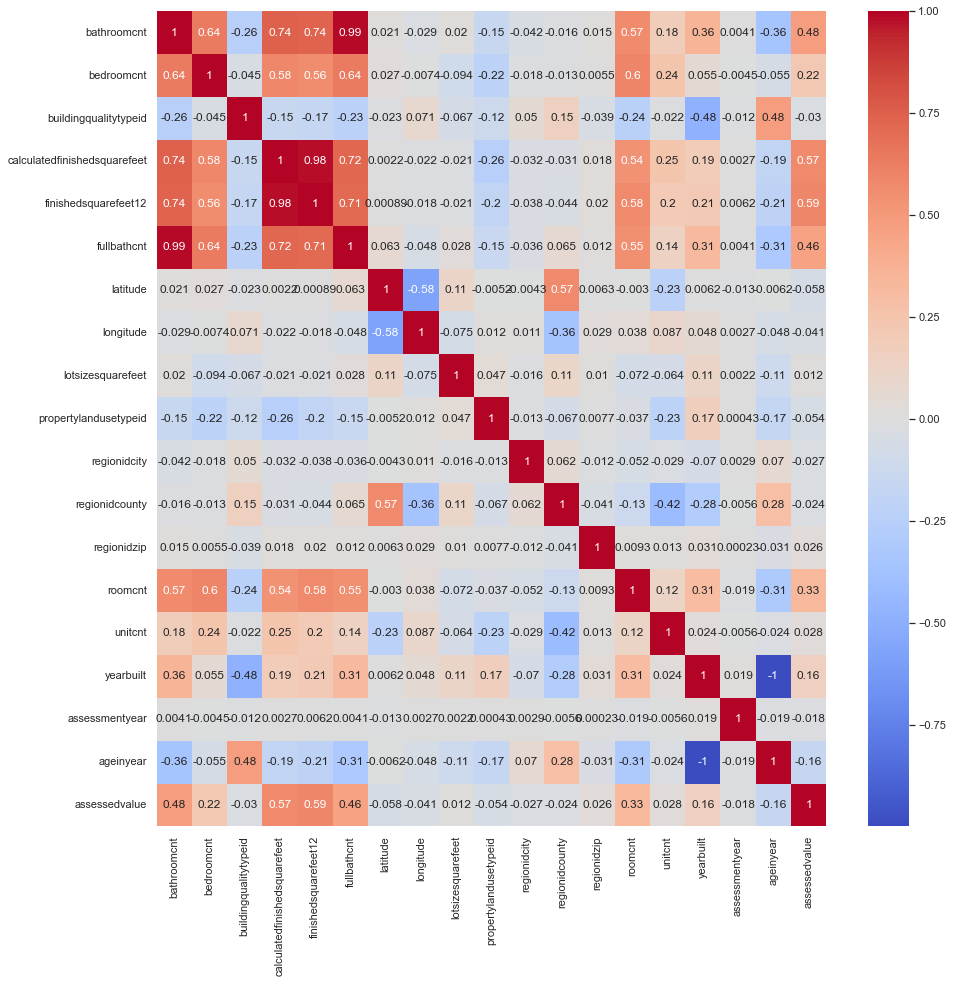

In [493]:
# Heatmap with all features

plt.figure(figsize = (15,15))
columns = ['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'assessmentyear',
 'ageinyear',
 'assessedvalue']
sns.heatmap(prop_2016_cleaned[columns].corr(), annot = True, cmap = 'coolwarm')

In [492]:
# Heatmap with all features

plt.figure(figsize = (15,15))
matrix = np.triu(prop_2016_cleaned[columns].corr())
columns = ['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'assessmentyear',
 'ageinyear',
 'assessedvalue']
sns.heatmap(prop_2016_cleaned[columns].corr(), annot = True, mask=matrix, cmap = 'coolwarm')

ValueError: Mask must have the same shape as data.

<Figure size 1080x1080 with 0 Axes>

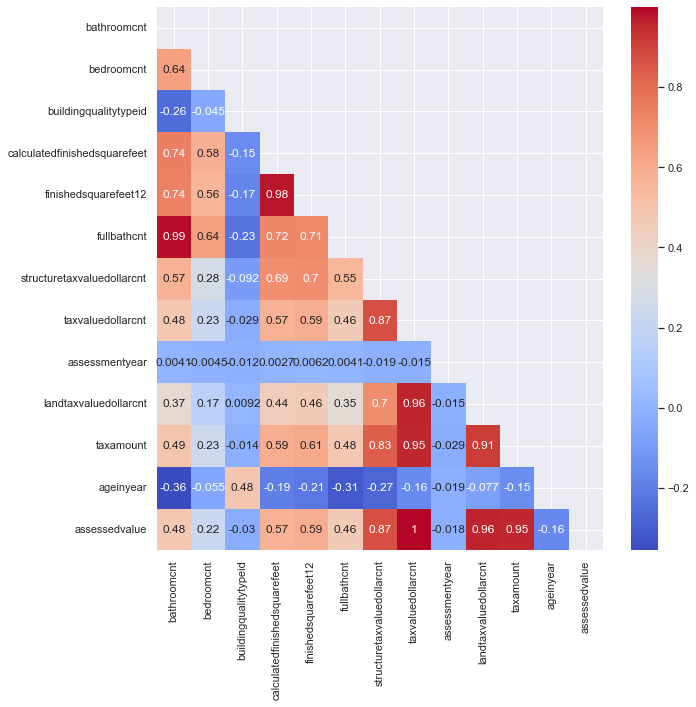

In [444]:
# Heatmap with some features

plt.figure(figsize = (10,10))
matrix = np.triu(prop_2016_cleaned[columns].corr())
columns = ['bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'ageinyear',
 'assessedvalue']
sns.heatmap(prop_2016_cleaned[columns].corr(), annot = True, mask=matrix, cmap = 'coolwarm');
plt.show()

## Pearson Correlation

In [411]:
prop_2016_cleaned.corr(method='pearson', min_periods=1)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
parcelid,1.000000,-0.029277,-0.006136,-0.075293,-0.002521,-0.023889,-0.077355,-0.025616,-0.083849,-0.013941,...,0.046876,0.046349,0.072617,0.156337,0.150536,-0.178445,0.131246,-0.000371,-0.074742,0.151226
bathroomcnt,-0.029277,1.000000,0.638447,-0.255893,0.742656,0.735810,0.985326,0.020796,-0.029290,0.020120,...,0.568308,0.175686,0.355639,0.574355,0.477377,0.004081,0.368188,0.486721,-0.355541,0.477159
bedroomcnt,-0.006136,0.638447,1.000000,-0.045235,0.578695,0.556049,0.635193,0.027406,-0.007376,-0.094391,...,0.598793,0.244068,0.054979,0.282438,0.225133,-0.004496,0.166241,0.234516,-0.054892,0.224450
buildingqualitytypeid,-0.075293,-0.255893,-0.045235,1.000000,-0.153076,-0.170755,-0.232970,-0.023166,0.070732,-0.067122,...,-0.244796,-0.021727,-0.482815,-0.092308,-0.029382,-0.011564,0.009218,-0.014221,0.482817,-0.029635
calculatedfinishedsquarefeet,-0.002521,0.742656,0.578695,-0.153076,1.000000,0.976717,0.722238,0.002200,-0.021512,-0.021019,...,0.537764,0.245614,0.194077,0.693520,0.573351,0.002685,0.440089,0.589920,-0.194049,0.573069
finishedsquarefeet12,-0.023889,0.735810,0.556049,-0.170755,0.976717,1.000000,0.714745,0.000889,-0.018214,-0.021442,...,0.576188,0.204160,0.214220,0.702744,0.589005,0.006169,0.457724,0.606577,-0.214132,0.588797
fullbathcnt,-0.077355,0.985326,0.635193,-0.232970,0.722238,0.714745,1.000000,0.062765,-0.048257,0.028054,...,0.547826,0.142670,0.313227,0.553201,0.458139,0.004061,0.351810,0.476092,-0.312964,0.457647
latitude,-0.025616,0.020796,0.027406,-0.023166,0.002200,0.000889,0.062765,1.000000,-0.576272,0.113921,...,-0.002973,-0.229419,0.006198,0.014265,-0.058330,-0.012547,-0.092616,-0.041917,-0.006167,-0.058159
longitude,-0.083849,-0.029290,-0.007376,0.070732,-0.021512,-0.018214,-0.048257,-0.576272,1.000000,-0.074791,...,0.037793,0.086524,0.048012,-0.070365,-0.040353,0.002742,-0.019358,-0.032870,-0.047897,-0.040742
lotsizesquarefeet,-0.013941,0.020120,-0.094391,-0.067122,-0.021019,-0.021442,0.028054,0.113921,-0.074791,1.000000,...,-0.072080,-0.063594,0.113703,0.027786,0.011654,0.002199,0.001309,0.012437,-0.113725,0.011730


## Variance Inflation Factor

Variance Inflation Factor (VIF) is used to detect multicollinearity
<b>When there is no multicollinearity, the VIF for each predictor should be 1.</b> Usually, any VIF value higher than 5 indicates high collinearity.

In [166]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF assumes the presence of a constant in X
X = sm.add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)[1:]

parcelid                            1.922841
bathroomcnt                        53.223122
bedroomcnt                          2.514263
buildingqualitytypeid               1.427203
calculatedfinishedsquarefeet       28.411239
finishedsquarefeet12               27.552624
fullbathcnt                        49.818479
latitude                            2.104979
longitude                           1.596040
lotsizesquarefeet                   1.057397
propertylandusetypeid               1.263078
regionidcity                        1.011145
regionidcounty                      2.434755
regionidzip                         1.008224
roomcnt                             2.174655
unitcnt                             1.485985
yearbuilt                       75848.416485
structuretaxvaluedollarcnt        311.353572
taxvaluedollarcnt                2009.153964
assessmentyear                      1.091100
landtaxvaluedollarcnt             953.323258
taxamount                          15.693908
ageinyear 

- As the results, `ageinyear`, `yearbuilt`, and `taxvaluedollarcnt` have high VIF values.

We are also interested in the correlations between the X variables and the y variable (median_value).

In [410]:
# Only look at the correlations with assessedvalue (our y variable)
cal_corr = prop_2016_cleaned.corr()
cal_corr['assessedvalue'].sort_values()

ageinyear                      -0.159805
latitude                       -0.058159
propertylandusetypeid          -0.054284
longitude                      -0.040742
buildingqualitytypeid          -0.029635
regionidcity                   -0.027171
regionidcounty                 -0.023523
assessmentyear                 -0.018094
lotsizesquarefeet               0.011730
regionidzip                     0.026091
unitcnt                         0.027667
parcelid                        0.151226
yearbuilt                       0.159407
bedroomcnt                      0.224450
roomcnt                         0.330279
fullbathcnt                     0.457647
bathroomcnt                     0.477159
calculatedfinishedsquarefeet    0.573069
finishedsquarefeet12            0.588797
structuretaxvaluedollarcnt      0.870541
taxamount                       0.954803
landtaxvaluedollarcnt           0.960358
taxvaluedollarcnt               0.999737
assessedvalue                   1.000000
Name: assessedva

- As the results above, the variables that are correlated the most with our target are `taxvaluedollarcnt`, `landtaxvaluedollarcnt` and `taxamount`.

## Forward or Bottom-Up approach

Building a linear model using only the most correlated variables. Starting with choosing one variable (usually the variable with the highest correlation with our target variable) and then we will add more variables and see if the $R^2$ improves.

In [168]:
# Look at the variables with highest correlation with y (`assessedvalue`)

prop_2016_cleaned['assessedvalue'].sort_values()

7149           10.0
1205           18.0
21378          18.0
7063           18.0
26008          18.0
            ...    
9752     19620408.0
11687    19620408.0
22786    20288892.0
16757    25605020.0
28314    29502930.0
Name: assessedvalue, Length: 29852, dtype: float64

In [ ]:
# Let's take review our correlations again, and add in the variables with the highest correlations (Latitude, AveRooms, HouseAge)

cal_corr['assessedvalue'].sort_values()

In [414]:
# Our model R-squared is not as good as our previous model, but the p-value is good,
# Let's add others variables to help predict the price (only columns with positive corr)
import statsmodels.api as sm

linreg = sm.OLS(y, X[['taxvaluedollarcnt', 'landtaxvaluedollarcnt','taxamount']]).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          assessedvalue   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.786e+07
Date:                Mon, 15 May 2023   Prob (F-statistic):                        0.00
Time:                        06:15:27   Log-Likelihood:                     -3.2789e+05
No. Observations:               29852   AIC:                                  6.558e+05
Df Residuals:                   29849   BIC:                                  6.558e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
taxvaluedollarcnt         0.9888      0.001   1557.621      0.000       0.988       0.990
landtaxvaluedollarcnt     0.0107      0.001     15.865      0.000       0.009       0.012
taxamount                 0.4247      0.036     11.802      0.000       0.354       0.495
==============================================================================
Omnibus:                    84975.203   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6003954165.083
Skew:                          38.012   Prob(JB):                         0.00
Kurtosis:                    2198.722   Cond. No.                         391.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- After adding every variable one by one, we were able to achieve 𝑅2 R 2 of 1 including only 3 independent variables out of 23. This model has the best performance ( 𝑅2 R 2 ) and the easiest interpretability (i.e., fewest variables).

In [ ]:
###### **Model Assessment with R<sup>2<sup/>** <br>
    
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 3.1.1 | All                                        | 0.606 |
| 3.1.2 | All minus Population                       | 0.606 |
| 3.1.3 | All minus Population, AveBedrms, Longitude | 0.521 |
| 3.2.1 | MedInc                                     | 0.473 |
| 3.2.2 | MedInc, AveRooms, Latitude, HouseAge       | 0.519 |

## Lasso Regression

In [175]:
from sklearn.linear_model import Lasso

In [176]:
# Instantiate the independent and dependent variables 

# Independent variables / features
X = prop_2016_cleaned.drop(columns = 'assessedvalue')

# Dependent variable / target
y = prop_2016_cleaned['assessedvalue']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [177]:
X_train.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear
1325,12715412,3.0,2,4,2184.0,2184.0,3,33769575.0,-118378701.0,1948.0,...,96121,5.5,1.0,1975,305881.0,676634.0,2015,370753.0,8021.65,41
4554,14173590,4.5,5,1,4243.0,4243.0,4,33906250.0,-117864040.0,8987.0,...,97043,9.0,4.0,2001,471867.0,1094277.0,2015,622410.0,12423.62,15
8083,12484806,1.0,3,7,1076.0,1076.0,1,33847420.0,-118120192.0,5083.0,...,96213,6.0,1.0,1950,92000.0,459000.0,2015,367000.0,6205.36,66
29244,11396121,3.0,4,7,1720.0,1720.0,3,33966976.0,-118328434.0,5996.0,...,96137,6.5,1.0,1940,65800.0,380000.0,2015,314200.0,7066.45,76
1848,11855132,2.0,3,7,1596.0,1596.0,2,34041982.0,-118123102.0,12106.0,...,96497,5.5,1.0,1954,225139.0,586300.0,2015,361161.0,8134.12,62


In [178]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (20896, 23)
The dimension of X_test is (8956, 23)


In [179]:
#Scale features

scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

In [417]:
# Lasso Regression

# Instantiate model
ls_model = Lasso(alpha = 0.1)

# Fit model
ls_model.fit(X_train_transform,y_train)
predict_ls = ls_model.predict(X_test)

# Score model
train_score_ls =ls_model.score(X_train_transform,y_train)
test_score_ls =ls_model.score(X_test_transform,y_test)
exp_ls = explained_variance_score(predict_ls, y_test)

# Evaluate model
ls_r2mse = r2(y_test, predict_ls)
ls_mse = MSE(y_test, predict_ls)
ls_mae = MAE(y_test, predict_ls)

The train score for ls model is 0.9999503081465864
The test score for ls model is 0.9999631003828261


In [418]:
# Print the results

print(f"Train score: {train_score_ls}")
print(f"Test score: {test_score_ls}")
print(f"EV score: {exp_ls}")
print(f"Rsquare: {ls_r2mse}")
print(f"RMSE: {ls_mse}")
print(f"MAE: {ls_mae}")

Train score: 0.9999503081465864
Test score: 0.9999631003828261
EV score: 4.625077032693881e-06
Rsquare: -271942941229.19077
RMSE: 1.1689536011436969e+23
MAE: 191829420534.81155


In [181]:
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.9999503067593221
0.9999630978301045


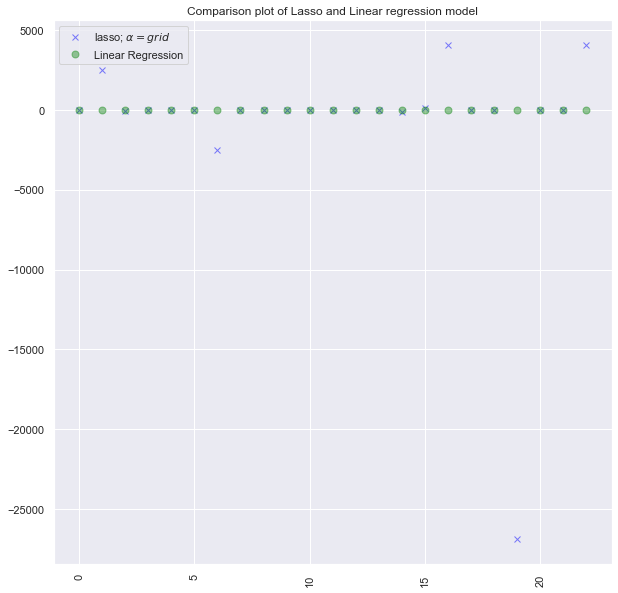

In [420]:
#plot size
plt.figure(figsize = (10, 10))

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='x',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(lr_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Lasso and Linear regression model")
plt.show()

Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response).

#### Ridge cross validation

In [432]:
from sklearn.linear_model import RidgeCV

# Ridge cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is -20988726.36603194
The train score for ridge model is -14190408.917311065


## Decision Tree

In [422]:
# Decision Tree

# Instantiate model
dtr_model = DecisionTreeRegressor(random_state = 0)

# Fit model
dtr_model.fit(X_train,y_train)
predict_dtr = dtr_model.predict(X_test)

# Score model
dtr_score_train = dtr_model.score(X_train,y_train)
dtr_score=dtr_model.score(X_test,y_test)
exp_dtr = explained_variance_score(predict_dtr,y_test)

# Evaluate model
dtr_r2mse = r2(y_test, predict_dtr)
dtr_mse = MSE(y_test, predict_dtr)
dtr_mae = MAE(y_test, predict_dtr)

In [424]:
# Print the results

print(f"Train score: {dtr_score_train}")
print(f"Test score: {dtr_score}")
print(f"EV score: {exp_dtr}")
print(f"Rsquare: {dtr_r2mse}")
print(f"RMSE: {dtr_mse}")
print(f"MAE: {dtr_mae}")

Train score: 1.0
Test score: 0.9934879733691777
EV score: 0.99313337079458
Rsquare: 0.9934879733691777
RMSE: 2799211094.2125115
MAE: 1983.8129187137115


In [241]:
from sklearn.tree import plot_tree

In [248]:
# Plot tree

plot_tree(dtr_model, 
          feature_names=X.columns, 
          rounded=True,
          impurity=True,
          filled=True,
          fontsize=8);

Error in callback <function flush_figures at 0x7fa0a09545e0> (for post_execute):


KeyboardInterrupt: 

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [428]:
# Random Forests

# Instantiate model
rf_model = RandomForestRegressor(n_estimators = 20,random_state = 0)

# Fit model
rf_model.fit(X_train,y_train)
predict_rf = rf_model.predict(X_test)

# Score model
rf_score_train = rf_model.score(X_train,y_train)
rf_score=rf_model.score(X_test,y_test)
exp_rf = explained_variance_score(predict_rf, y_test)

# Evaluate model
rf_r2mse = r2(y_test, predict_rf)
rf_mse = MSE(y_test, predict_rf)
rf_mae = MAE(y_test, predict_rf)

In [226]:
rf_score

0.9789606229384404

In [227]:
exp_rf

0.9769464310385063

In [429]:
# Print the results

print(f"Train score: {rf_score_train}")
print(f"Test score: {rf_score}")
print(f"EV score: {exp_rf}")
print(f"Rsquare: {rf_r2mse}")
print(f"RMSE: {rf_mse}")
print(f"MAE: {rf_mae}")

Train score: 0.9977312695218826
Test score: 0.9789606229384404
EV score: 0.9769464310385063
Rsquare: 0.9789606229384404
RMSE: 9043829367.540787
MAE: 2645.9559596918266


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [394]:
# KNN

# Instantiate model
knnr_model = KNeighborsRegressor(n_neighbors=3)

# Fit model
knnr_model.fit(X_train,y_train)
predict_knnr = knnr_model.predict(X_test)

# Score model
knnr_score_train = knnr_model.score(X_train,y_train)
knnr_score = knnr_model.score(X_test,y_test)
exp_knnr = explained_variance_score(predict_knnr, y_test)

# Evaluate model
knnr_r2mse = r2(y_test, predict_knnr)
knnr_mse = MSE(y_test, predict_knnr)
knnr_mae = MAE(y_test, predict_knnr)

In [395]:
# Print the results

print(f"Train score: {knnr_score_train}")
print(f"Test score: {knnr_score}")
print(f"EV score: {exp_knnr}")
print(f"Rsquare: {knnr_r2mse}")
print(f"RMSE: {knnr_mse}")
print(f"MAE: {knnr_mae}")

Train score: 0.9942013116617205
Test score: 0.9813041585561774
EV score: 0.9785633594581937
Rsquare: 0.9813041585561774
RMSE: 8036454663.358529
MAE: 15131.098741997917


## XG Boost

In [ ]:
import xgboost as xg

In [392]:
# XG Boost

# Instantiate model
xgb_model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1)

# Fit model
xgb_model.fit(X_train,y_train)
predict_xgb = xgb_model.predict(X_test)

# Score model
xgb_score_train = xgb_model.score(X_train,y_train)
xgb_score = xgb_model.score(X_test,y_test)
exp_xgb = explained_variance_score(predict_xgb, y_test)

# Evaluate model
xgb_r2mse = r2(y_test, predict_xgb)
xgb_mse = MSE(y_test, predict_xgb)
xgb_mae = MAE(y_test, predict_xgb)

In [393]:
# Print the results

print(f"Train score: {xgb_score_train}")
print(f"Test score: {xgb_score}")
print(f"EV score: {exp_xgb}")
print(f"Rsquare: {xgb_r2mse}")
print(f"RMSE: {xgb_mse}")
print(f"MAE: {xgb_mae}")

Train score: 0.9999998136160061
Test score: 0.9897109983713397
EV score: 0.9890674935038765
Rsquare: 0.9897109983713397
RMSE: 4422753336.265137
MAE: 2270.826426406799


## Gradient Boost

In [271]:
from sklearn.ensemble import GradientBoostingRegressor

In [382]:
# GradientBoostingRegressor

# Instantiate model
gbr_model = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, max_depth = 1, random_state = 0)

# Fit model
gbr_model.fit(X_train,y_train)
predict_gbr = gbr_model.predict(X_test)

# Score model
gbr_score_train = gbr_model.score(X_train,y_train)
gbr_score = gbr_model.score(X_test,y_test)
exp_gbr = explained_variance_score(predict_gbr, y_test)

# Evaluate model
gbr_r2mse = r2(y_test, predict_gbr)
gbr_mse = MSE(y_test, predict_gbr)
gbr_mae = MAE(y_test, predict_gbr)

In [389]:
# Print the results

print(f"Train score: {gbr_score_train}")
print(f"Test score: {gbr_score}")
print(f"EV score: {exp_gbr}")
print(f"Rsquare: {gbr_r2mse}")
print(f"RMSE: {gbr_mse}")
print(f"MAE: {gbr_mae}")

Train score: 0.9959074969356666
Test score: 0.9863669739696754
EV score: 0.9842182539736701
Rsquare: 0.9863669739696754
RMSE: 5860190671.080536
MAE: 20566.797337454598


## Regression Model Evaluation

| Metric | Name | sk-learn.metrics |Description |
|:--|:--|:--|:--|
|$R^2$ | Coefficient of Determination | `r2_score()` |<ul><li>Proportion of variance in the dependent variable that is predicted by the independent variables</li><li>Typically ranges from 0 to 1, with 1 being a perfect fit and 0 being no better than predicting the dependent variable with its mean</li><li>Relative measure of goodness of fit</li></ul> |
| RMSE | Root Mean Squared Error | `mean_squared_error(squared = False)`|<ul><li>The standard deviation of the residuals</li><li>Ranges from 0 to infinity, with 0 being a perfect fit and the larger the number the more error</li><li>Absolute measure of goodness of fit, and therefore cannot be used to compare across different data sets, but between models with the same dataset</li><li>Same units as the dependent variable. </li><li>Predictions farther away have a greater impact on the RMSE and is therefore sensitive to outliers</li></ul>|
| MAE | Mean Absolute Error | `mean_absolute_error()` | <ul><li>The average absolute values of the errors between the true value and the predicted value</li><li>Similar to RMSE, Ranges from 0 to infinity with 0 being a perfect fit and is an absolute measure of fit</li><li>Predicted values father away contribute proportionally to the MAE and is therefore more robust to outliers than RMSE </li><li>Relatively intuitive and simple to explain regression metric. </li></ul>

###### **Model Assessment
    
| Model | Test Score | 
|-------|------------|
| Linear Regression | 100% |
| Lasso Regression| 99.96% |
| Decision Tree | 99.35% |
| Random Forests | 97.89% |
| Gradient Boost| 98.63% |
| XG Boost | 98.97% |
| KNN | 98.13% |

- <b>Linear regression model</b> has the highest test score at 1, followed by Lasso regression model at 0.999.